In [5]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

Get the data and pre-process it

In [6]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

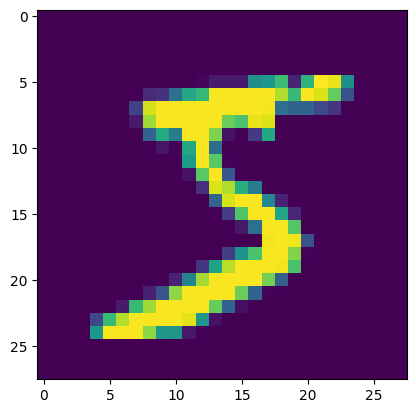

In [7]:
plt.imshow(X_train[0])

In [8]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

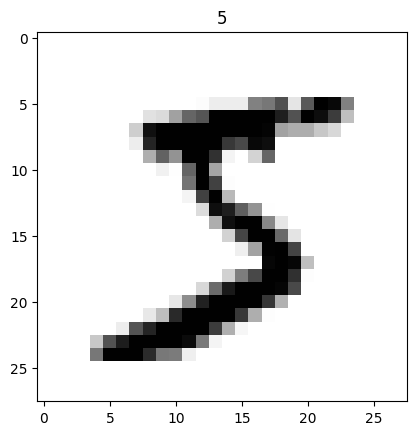

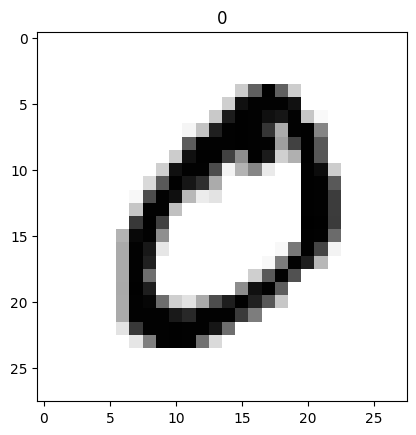

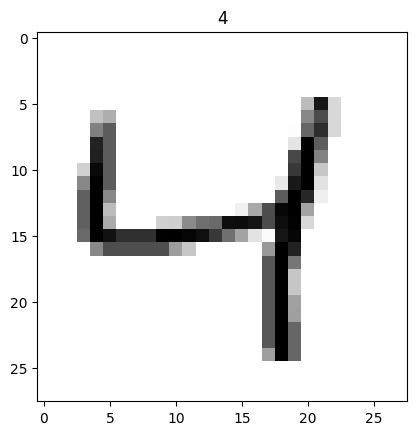

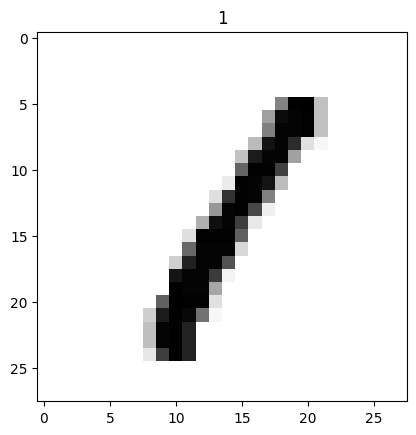

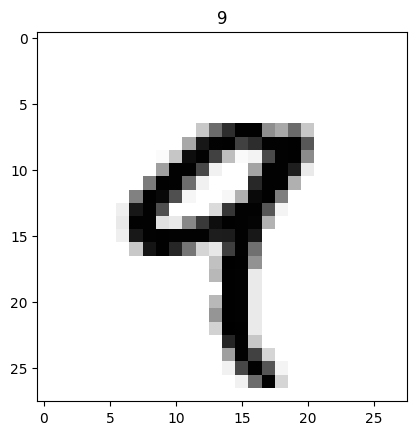

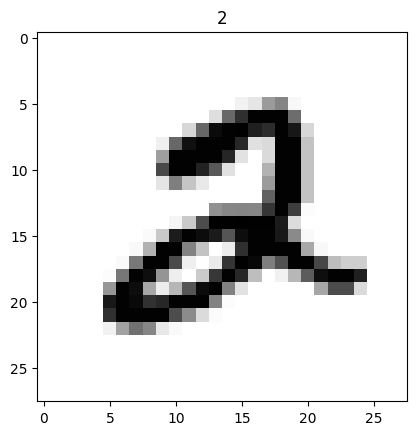

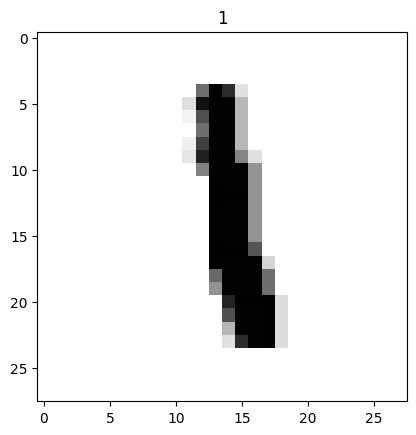

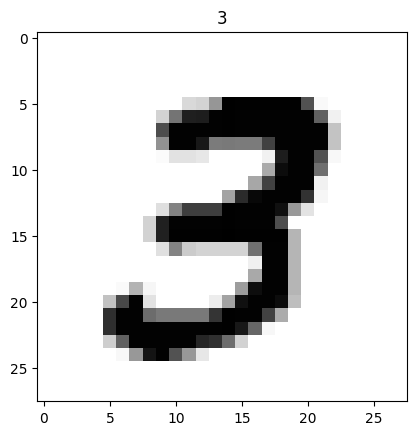

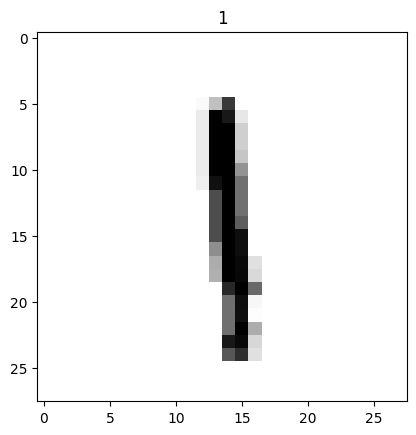

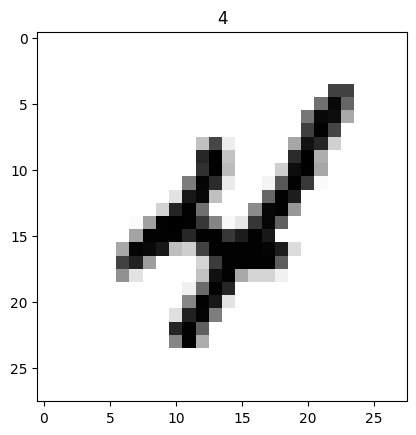

In [9]:
for i in range(10):
    plot_input_img(i)

In [10]:
#pre-process the image

#Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshape/ expand the dimensions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#Convert classes to one hot vectors

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape =(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [13]:
model.compile(optimizer = 'adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [14]:
#CALLBACKS
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EARLYSTOPPING
es = EarlyStopping(monitor='val_acc', min_delta= 0.01, patience= 4, verbose= 1)

#MODEL CHECK POINT
mc = ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose= 1, save_best_only= True)

cb = [es,mc]

MODEL TRAINING

In [16]:
his = model.fit(X_train, y_train, epochs= 5, validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 83s 63ms/step - loss: 0.1097 - accuracy: 0.9663 - val_loss: 0.0786 - val_accuracy: 0.9767
Epoch 2/5
1313/1313 [==============================] - 85s 64ms/step - loss: 0.0697 - accuracy: 0.9782 - val_loss: 0.0606 - val_accuracy: 0.9822
Epoch 3/5
1313/1313 [==============================] - 83s 63ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0522 - val_accuracy: 0.9837
Epoch 4/5
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 5/5
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0444 - val_accuracy: 0.9868


In [17]:
model_s = keras.models.load_model("handwritten digit recognition.ipynb")

OSError: Unable to open file (file signature not found)